# 1 - Questões em sala

1. **Em respeito a curva de magnetização do material, por que ela não bate no zero? Por que ela não continua reta?**

Esse fenômeno acontece devido as características não-lineares do material ferromagnético utilizado no interior da máquina. Devido à histerese magnética e a saturação, mesmo que não haja fluxo magnético no interior do material, há um campo magnético residual no interior do máquina. 

2. **Como não queimar a máquina no ensaio de medição da resistência de armadura?**

Durante este ensaio, é necessário que o experimentador tenha o controle sobre a corrente de armadura, não permitindo que ela passe do valor nominal da máquina. 

3. **Em respeito das máquinas síncronas construídas com eletroímã e com imã permanente, qual delas é mais eficiente?**

A escolha entre uma máquina com ímã permanente e uma com eletroímã deve considerar as especificidades da aplicação. As máquinas com imã não requerem corrente de excitação para criar o campo magnético no rotor, o que elimina as perdas associadas ao cobre, e permitindo, assim serem mais eficientes em condições de operação em regime permanente. De modo análogo, as máquinas com eletroímã permitem um maior controle sobre o fluxo magnético do rotor, oferecendo maior flexibilidade e condições de operação para diferentes cargas.

4. **Quais foram os cuidados tomados ao realizar a inserção do gerador síncrono na rede elétrica?**

Para evitar danos ao gerador, à rede e aos equipamentos conectados é preciso que: 

1. As tensões eficazes de linha do gerador e da rede devem ser iguais.
2. Ambos sistemas devem possuir a mesma sequência de fases

Primeiro, usando voltímetros, a corrente de campo da máquina que está entrando deve ser ajustada até que sua tensão de terminal seja igual à tensão de linha do sistema. Segundo, a sequência de fases do gerador deve ser comparada com a sequência de fases do sistema. Isso é feito a partir do método das três lâmpadas. Nessa abordagem, três lâmpadas incandescentes são conectadas aos terminais abertos da chave que liga o gerador ao sistema. À medida que a fase se modifica entre os dois sistemas, as lâmpadas inicialmente brilham muito (grande diferença de fase) e então brilham fracamente (pequena diferença de fase). Se as três lâmpadas brilharem e apagarem-se em conjunto, isso significa que os sistemas terão a mesma sequência de fases. Quando as três lâmpadas estiverem apagadas, a diferença de tensão entre elas é zero e os sistemas estão em fase.

5. **Quem controla a potência ativa no gerador síncrono?**

O controle da potência ativa do gerador síncrono está ligado ao motor de partida, também chamado de governador. Aumentar a tensão do governador, aumenta a velocidade de giro do rotor e, consequentemente, aumenta a potência ativa do gerador. 

6. **Como funciona o motor de relutância?**

O principio de funcionamento dos motores de relutância está baseada na relutância magnética. Quando o estator do motor é energizado, cria-se um campo magnético ao redor do rotor. Como o rotor é de material ferromagnético, ele é atraído para a posição em que a relutância é mínima, ou seja, para onde o campo magnético é mais forte. À medida que o campo magnético no estator gira, o rotor tende a segui-lo, movendo-se continuamente para alinhar-se com o campo de menor relutância.

7. **Qual a desvantagem associada ao uso do motor de reluntância?**

A desvantagem associada do motor de relutância é o seu comportamento semelhante ao de um indutor. Por tender a ter um fator de potência baixo, significa que o motor consome mais potência reativa, o que exige uma instalação de equipamentos para corrigir o fator de potência. 

8. **Como funciona o compensador síncrono?**

Um compensador síncrono é uma máquina síncrona clássica que é operada para fornecer somente energia reativa. Eles operam sem carga mecânica, desempenhando um papel crucial para a correção de fator de potência. Seu princípio de funcionamento baseia-se no fato de que, a depender da característica de operação, a máquina síncrona pode ser ajustada para fornecer ou absorver reativos do sistema elétrico. 

- Quando a máquina opera sub-excitada, o compensador absorve potência reativa, sendo útil para compensar cargas indutivas.  

- Quando a máquins opera sobre-excitado, o compensador gera potência reativa, sendo útil para compensar cargas capacitivas.

9. **Por que o motor de relutância possui pouco torque?**

O motor de relutância possui pouco torque principalmente devido à sua natureza de operação e à forma como o torque é gerado. O torque em um motor de relutância é produzido pela tendência do rotor de se alinhar com as posições de menor relutância magnética criadas pelo campo magnético do estator. Essa tendência, embora eficiente em termos de simplicidade de design, não gera um torque muito elevado

10. **Quais cuidados devem ser tomados durante a partida da máquina síncrona?**

Para dar a partida em uma máquina síncrona, é preciso que: 

- Desligue-se a excitação da máquina
- Fazer um curto-circuito no circuito de campo
- Realizar a partida como motor de indução

O motor síncrono desenvolve conjugado apenas na velocidade síncrona e, assim, não tem conjugado de partida. Para fazer com que um motor síncrono tenha partida própria, um enrolamento do tipo gaiola de esquilo é inserido.

11. **Explique o ângulo de carga em função da estabilidade da máquina**

O ângulo de carga $\delta$ está intrinsicamente associado à estabilidade estática da máquina síncrona. O limite de estabilidade estática está relacionado com a sua capacidade de manter o sincronismo durante a operação da máquina. A medida que mais cargas são inseridas em paralelo à máquina, mais torque é exigido. Para manter o sincronismo, há um aumento no ângulo de carga. Quando o ângulo de carga é igual a 90 graus, a máquina chega ao seu limite de estabilidade. Caso seja exigido mais torque, a máquina perde o seu sincronismo e, consequentemente, a sua estabilidade. 

# 2 - Introdução aos ensaios com Máquinas Síncronas

## 2.1 Máquina Síncrona

As máquinas síncronas são equipamentos elétricos rotativos e operam com base no princípio da sincronização entre o campo magnético rotativo do estator e o campo magnético do rotor. Essa sincronia garante a operação constante e eficiente da máquina. O Estator é composto por enrolamentos trifásicos distribuídos em ranhuras e, quando alimentado por uma fonte de tensão alternada trifásica, cria um campo magnético rotativo. A velocidade desse campo é diretamente proporcional à frequência da tensão aplicada. O Rotor possui um enrolamento de campo alimentado por corrente contínua, o que gera um campo magnético estacionário. A interação entre os campos do estator e do rotor produz um torque eletromagnético que impulsiona o rotor a acompanhar a velocidade do campo rotativo do estator.


## 2.2 - Objetivo dos ensaios realizados

Com o objetivo de estudar o funcionamento das máquinas síncronas para ambos os modos de operação, foi realizado diversos ensaios no Laborátorio de Máquinas Elétricas da Universidade Federal de Campina Grande, tornando possível verificar a realização dos ensaios de levantamento dos parâmetros da máquina e consolidar o conhecimento à respeito das máquinas síncronas. 

# 3 - Realização dos ensaios 

Um conjunto simples de ensaios pode ser usado para determinar os parâmetros significativos de uma máquina síncrona, como a reatância síncrona. Dois desses ensaios são o ensaio a vazio, em que a tensão de terminal da máquina é medida em função da corrente de campo e o ensaio de curto-circuito, em que a armadura é curto-circuitada e a corrente de armadura de curto-circuito é medida em função da corrente de campo. O ensaio a vazio fornece informações sobre as exigências de excitação, as perdas no núcleo e (para máquinas rotativas) as perdas por atrito e ventilação, ao passo que um ensaio de curto-circuito fornece informações sobre as reações magnéticas da corrente de carga, as impedâncias de dispersão e as perdas associadas às correntes de carga.

Além disto, também é fundamental estudar o comportamento da máquina frente à alterações na natureza da carga e também em relação à potência que ela consome. Para isto, foram preparados ensaios de verificação do comportamento da máquina frente à mudanças na carga com e sem controle da tensão de terminal. 

## 3.1 - Equipamento e Instrumentos Utilizados

Para a realização dos ensaios no laboratório, foram utilizados: 

1. 1 Máquina Síncrona trifásica 4 polos;
2. 2 varivolts;
3. 3 fontes CC;
4. 5 multímetros;
5. 2 wattímetros;
6. 1 máquina CC com excitação independente;
7. 1 painel de cargas ligada em delta na voltagem de 220V (lâmpadas);
8. 1 conta giros – tacômetro digital;
9. Fios e cabos;

A máquina síncrona utilizada possui uma potência nominal de $2$ **kVA** e tensão nominal de $220$ **V**. Os dados de placa da máquina podem ser observados na Tabela 1: 

<div align = 'center'>

|      Potência Nominal       |   2 kVA  |
|:---------------------------:|:--------:|
|            Polos            |     4    |
|     Velocidade Síncrona     | 1800 rpm |
| Corrente Máxima de Armadura |    5 A   |
|   Corrente Máxima de Campo  |   0.6 A  |
|  Tensão Nominal de Armadura |   220 V  |
|      Fator de Potência      |    0.8   |

**Tabela 01:** Dados de placa da Máquina Síncrona utilizada nos ensaios

</div>

1-. Plote os gráficos a partir das medições obtidas, fazendo superposições e análise dos resultados com a finalidade de verificar o comportamento do gerador síncrono em função da tensão, carga e excitação, fator de potência e ângulo de carga.

5-. Plote os gráficos a partir das medições obtidas dos ensaios do motor síncrono a partir dos dados obtidos na tabela 5, fazendo superposições e análise dos resultados com a finalidade de verificar o comportamento do motor síncrono em função da tensão, carga e excitação e fator de potência.

6-. Trace as curvas do motor síncrono do ângulo de carga de forma aproximada em função da carga e da excitação.


# 4 - Ensaio de determinação da curva de magnetização da máquina operando como gerador síncrono

## 4.1 - Ensaio de Circuito-Aberto
Para realizar o ensaio, a máquina síncrona foi acionada como um gerador por um motor de corrente contínua. O circuito externo do estator é deixado aberto. Em seguida, a corrente de campo é variada gradualmente, e para cada valor de corrente, a tensão induzida em uma das fases do estator é medida. Os resultados encontrados para este ensaio estão dispostos na **Tabela 02.**

<div align = 'center'>

| **Corrente de Campo (A)** | **Tensão Induzida no estator (V)** |
|:-------------------------:|:----------------------------------:|
|           0.001           |                  7.4               |
|            0.1            |                 45.0               |
|            0.2            |                 65.9               |
|            0.3            |                100.0               |
|            0.4            |                117.8               |
|            0.5            |                131.6               |
|            0.6            |                142.0               |
|            0.7            |                152.0               |
|            0.78           |                158.2               |

**Tabela 02:** Valores coletados da tensão fase neutro e a corrente de excitação do gerador síncrono movido por um motor de corrente contínua.

</div>

## 4.2 - Ensaio de Curto-Circuito

Para efetuarmos este ensaio será realizado um curto circuito trifásico fase neutro nos terminais do gerador e será inserido um medidor de corrente entre os terminais de uma das fases e ou neutro e um amperímetro para medir a corrente contínua do campo. Os resultados encontrados estão dispostos na **Tabela 03.**

<div align = 'center'>

| **Corrente de Campo (A)** | **Corrente de Curto-Circuito na Armadura (A)** |
|:-------------------------:|:----------------------------------------------:|
|            0.0            |                      0.36                      |
|            0.1            |                       2.2                      |
|            0.2            |                      4.08                      |
|            0.3            |                      6.11                      |

**Tabela 03:** Valores coletados das leitura da corrente de campo e armadura fase neutro do ensaio do gerador em curto.
</div>

Para traçar a curva de magnetização da máquina a partir dos dois ensaios realizados, foi utilizado a linguagem de programação *Python*. A partir dos dados coletados, é feita a interpolação utilizando a função *CubicSpline*. A característica linear da máquina, ou linha de entreferro, é encontrada a partir das duas primeiras medições do ensaio de circuito-aberto, os quais a máquina se encontra em sua região de comportamento linear.  

In [10]:
# Configuração de pacotes Python
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from math import sqrt

In [12]:
# Curva CA
Vt_ca = np.array([7.4, 45.0, 65.9, 100.0, 117.8, 131.6, 142.0, 152.0, 158.2])
If_ca = np.array([0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.78])

# Curva CC
If_cc = np.array([0.0, 0.1, 0.2, 0.3])
Ia_cc = np.array([0.36, 2.2, 4.08, 6.11])

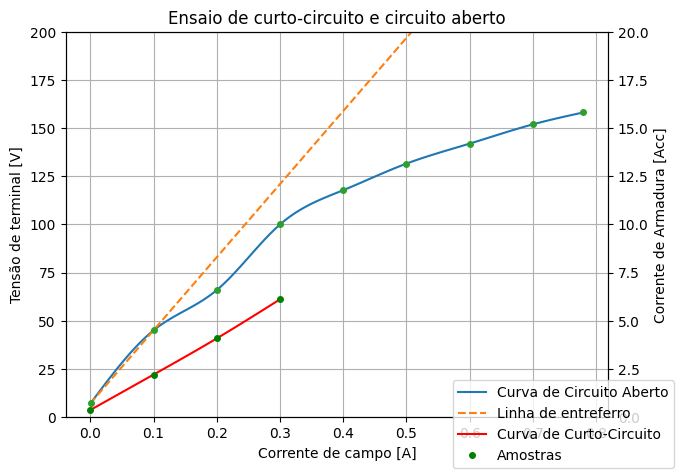

In [15]:
# Interpolação dos dados do ensaio de circuito aberto e ensaio de curto-circuito
curva_ca = CubicSpline(If_ca, Vt_ca, bc_type = 'natural')
curva_cc = CubicSpline(If_cc, Ia_cc, bc_type = 'natural')

# Interpolação com os dois primeiros pontos para extrair a característica linear
linha_entreferro = CubicSpline(If_ca[:2], Vt_ca[:2], bc_type = "natural")

# Intervalos para o gráfico
n_amostras = 100 # Número de pontos para o gráfico
CA = np.linspace(0, np.max(If_ca), n_amostras)
CC = np.linspace(0, np.max(If_cc), n_amostras)

# Configuração do gráfico
fig,ax1 = plt.subplots(figsize = (7,5))
ax1.set_title('Ensaio de curto-circuito e circuito aberto')
ax1.set_xlabel('Corrente de campo [A]')
ax1.set_ylabel('Tensão de terminal [V]')
ax1.grid(True)

# Traçando as curvas
ax1.plot(CA, curva_ca(CA), label = 'Curva de Circuito Aberto')
ax1.plot(CA, linha_entreferro(CA),linestyle = 'dashed', label = 'Linha de entreferro')
ax1.plot(If_ca, Vt_ca, marker='o', linestyle='None', ms=4)
ax1.set_ylim(0,200)


ax2 = ax1.twinx()
ax2.set_ylabel('Corrente de Armadura [Acc]')
ax2.plot(CC, curva_cc(CC),color = 'red' ,label = 'Curva de Curto-Circuito')
ax2.plot(If_cc, Ia_cc, marker='o', color = 'green', linestyle='None', ms=4, label='Amostras')
ax2.set_ylim(0,20)


fig.legend(loc='lower right')

## 4.3 Determinação da reatância síncrona não saturada ($X_{s_{(ns)}}$) e saturada ($X_{s_{(s)}}$)

A reatância síncrona é um parâmetro fundamental na análise e caracterização de máquinas síncronas. Ela representa a oposição do circuito magnético da máquina ao fluxo magnético variável, e está diretamente relacionada ao fenômeno da indução eletromagnética. O processo para determinação das reatância está descrito a seguir.

### Determinação de $X_{s_{(ns)}}$: 

1. Escolher um valor sobre a linha de entreferro
2. Verificar a corrente de armadura correspondente a excitação
3. Encontrar a reatância pela razão entre as grandezas

### Determinação de $X_{s_{(s)}}$:

1. Encontrar a reatância pela razão entre a Tensão terminal nominal e a Corrente de armadura nominal 

In [11]:
# Características nominais da máquina
Vt_nominal = 220 # Volts [V] (Trifásica)
S_nominal = 2e3 # Volt-Ampere [VA]

Ia_nominal = S_nominal / (sqrt(3) * Vt_nominal)

In [73]:
linha_entreferro_Vt_x_If = CubicSpline(Vt_ca[:2], If_ca[:2],  bc_type = "natural")

# Excitação corresponde a tensão nominal, considerando a caracteristica linear
If_linear = linha_entreferro_Vt_x_If(Vt_nominal)
Ia_linear = curva_cc(If_linear)

Xs_nao_saturada = (Vt_nominal / sqrt(3)) / Ia_linear

print(f'O valor da Reatância Sincrona Não Saturada é igual a {Xs_nao_saturada} ohms/fase')

Xs_saturada = (Vt_nominal / sqrt(3)) / Ia_nominal

print(f'O valor da Reatância Sincrona Saturada é igual a {Xs_saturada} ohms/fase')

O valor da Reatância Sincrona Não Saturada é igual a 11.718539198919167 ohms/fase
O valor da Reatância Sincrona Saturada é igual a 24.2 ohms/fase




# 5 - Ensaio do gerador síncrono com carga operando com e sem controle de tensão terminal
Um gerador síncrono está sendo acionado por um motor de corrente contínua 
Para observar o comportamento do gerador frente a inclusão de um banco de cargas trifásicas equilibradas para operar em 220V, foi realizada a montagem mostrada na **Figura X**. Estas cargas possuem um fator de potência unitário. Durante a inclusão das cargas, a velocidade de 1800 RPM é mantida constante através do controle da tensão de armadura do motor CC com excitação independente mediante um autotransformador trifásico. Onde a tensão CC da armadura do motor CC será aumentada toda vez que for inserida carga no gerador.


## 5.1 - Ensaio sem controle de tensão 

Para estudar as características de funcionamento do gerador síncrono operando com controle de velocidade de sem controle de tensão terminal, a corrente de campo será mantida constante quando se varia a carga. Os resultados das medições deste ensaio podem ser vistas na **Tabela 04**.

<div align = 'center'>

| **Potência da carga (W)** | **Tensão Terminal (V)** | **Corrente de (A)** | **Potência de saída (W)** |
|:-------------------------:|:-----------------------:|:-------------------:|:-------------------------:|
|             0             |           220           |         0.0         |            0.0            |
|            450            |           211           |         1.11        |           405,66          |
|            900            |           208           |         2.28        |           821,41          |
|            1350           |           197           |         3.32        |          1132,83          |
|            1800           |           181           |         4.36        |          1366,87          |
|            2250           |           163           |         5.14        |          1451,15          |


**Tabela 04:** Medição da tensão terminal e corrente de armadura ajustando a tensão terminal e velocidade do motor cc de acordo com o aumento de carga do gerador sem controle de tensão.  

</div>


## 5.2 - Ensaio com controle de tensão

Para observar o funcionamento da máquina como gerador com controle de tensão terminal, a velocidade foi ajustada para 1800 RPM de forma constante através do motor CC mediante o ajuste da tensão CC da armadura, toda vez que muda a carga do gerador. Também foi controlada a tensão terminal do gerador a cada mudança na carga, através do ajuste da corrente de campo. Os resultados das medições deste ensaio podem ser vistas na **Tabela 05**

<div align = 'center'>

| Potência da carga (W) | Corrente de Campo (A) | Tensão Terminal (V) | Corrente de (A) | Potência de saída (W) |
|:---------------------:|:---------------------:|:-------------------:|:---------------:|:---------------------:|
|           0           |          0,45         |         220         |        0        |          0.0          |
|          450          |          0,47         |         220         |       1,17      |         445,83        |
|          900          |          0,48         |         220         |       2,51      |         956,44        |
|          1350         |          0,54         |         220         |       3,65      |        1390,83        |
|          1800         |          0,59         |         220         |       4,86      |        1852,91        |
|          2250         |          0.66         |         220         |       6.09      |        2320,60        |

**Tabela 05:** Medição da corrente de campo, tensão terminal e corrente de armadura ajustando a tensão terminal e velocidade do motor cc de acordo com o aumento de carga do gerador com controle de tensão.

</div>

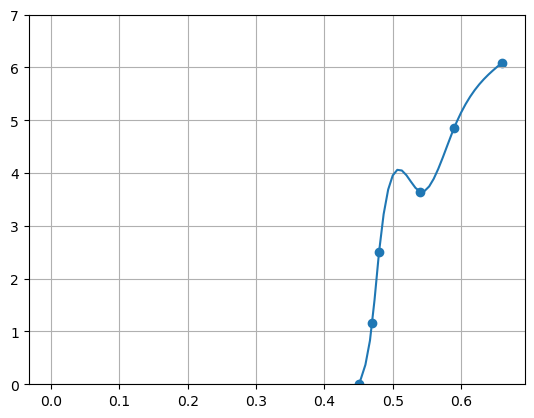

In [114]:
# Dados coletados no ensaio 

Pot_lampadas = np.array([0, 450, 900, 1350, 1800, 2250])
If_ensaio_4 = np.array([0.45, 0.47, 0.48, 0.54, 0.59, 0.66])
Ia_ensaio_4 = np.array([0, 1.17, 2.51, 3.65, 4.86, 6.09]) 

curva_excitacao = CubicSpline(If_ensaio_4, Ia_ensaio_4, bc_type= 'natural')

# Intervalos para o gráfico
If = np.linspace(0, np.max(If_ensaio_4), n_amostras)

plt.plot(If, curva_excitacao(If))
plt.scatter(If_ensaio_4, Ia_ensaio_4)
# plt.xlim(0, np.max(If_ensaio_4))
plt.ylim(0,7)
plt.grid(True)

## 5.3 Comentários sobre os resultados obtidos

...